In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/content/mal_full_offensive_train.tsv', error_bad_lines=False, sep="\t", header=None)
test= pd.read_csv('/content/mal_full_offensive_dev.tsv', error_bad_lines=False, sep="\t", header=None)
print(train)
print(test)

                                                       0              1
0      പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്ത...  Not_offensive
1      ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...  Not_offensive
2      ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...  Not_offensive
3              Sushin syam  Shaiju khalid  Midhun manual  Not_offensive
4                              J A K E S.   B EJ O Y !!!  Not_offensive
...                                                  ...            ...
16005  കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...  Not_offensive
16006  ente mammookka ningal puliyalla oru simhama......  Not_offensive
16007  Lucifer mass dialogues Ellam onnu comment chey...  Not_offensive
16008                Like from Madurai (Tamil nadu) ....  not-malayalam
16009  അടിമകൾ ആയി ജീവിച്ചു മാറിക്കയല്ല ചാവേറായി ചാവാറ...  Not_offensive

[16010 rows x 2 columns]
                                                      0              1
0     Gopichettante BGM um mammookayum 

In [3]:
df=train.filter([1,0], axis=1)
df_test=test.filter([1,0],axis=1)

In [4]:
df[1].value_counts()

Not_offensive                           14153
not-malayalam                            1287
Offensive_Targeted_Insult_Individual      239
Offensive_Untargetede                     191
Offensive_Targeted_Insult_Group           140
Name: 1, dtype: int64

In [5]:
#removing @ and #
def punc(df):
    df[0] = df[0].str.replace('[#@()]','')
    df[0]=df[0].str.replace('[^\w\s]','')
    print(df)

In [6]:
punc(df)
punc(df_test)

                   1                                                  0
0      Not_offensive         പലദശ പല ഭഷ ഒര ഒര രജവ  അലലത  സവനത രജവയത അലല
1      Not_offensive             ഈ ഓണ ഏടടന പളളർകക ഉളളതണ എനന ഉളളവർ ലക അട
2      Not_offensive  ആരണട ആരണട തലണടകണ ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ Royal M...
3      Not_offensive          Sushin syam  Shaiju khalid  Midhun manual
4      Not_offensive                              J A K E S   B EJ O Y 
...              ...                                                ...
16005  Not_offensive  കടട ലലടടൻ ഫൻസന ദവതത ഓർതത അമത പരതകഷ കണട തയറററൽ ...
16006  Not_offensive  ente mammookka ningal puliyalla oru simhamaejj...
16007  Not_offensive  Lucifer mass dialogues Ellam onnu comment chey...
16008  not-malayalam                      Like from Madurai Tamil nadu 
16009  Not_offensive                അടമകൾ ആയ ജവചച മറകകയലല ചവറയ ചവറണ പതവ

[16010 rows x 2 columns]
                  1                                                  0
0     Not_offensive  Gopichettante BGM 

In [7]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [8]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [9]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (16010 items)
x: LMTextList
xxbos പലദശ പല ഭഷ ഒര ഒര രജവ അലലത സവനത രജവയത അലല,xxbos ഈ ഓണ ഏടടന പളളർകക xxunk എനന ഉളളവർ ലക അട,xxbos ആരണട ആരണട തലണടകണ ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ xxmaj royal xxmaj mech ആട ആരണട ആരണട മശ പരകകനന ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal xxmaj mech ആട,xxbos xxmaj sushin syam xxmaj xxunk khalid xxmaj midhun manual,xxbos j a k e s b xxup xxunk o y
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1999 items)
x: LMTextList
xxbos xxmaj xxunk xxup bgm um xxunk xxunk like,xxbos ഇത ഒര പണണ തനന ആണ direct ചയയനനത polichu nivin,xxbos പഥവരജ സരജടടൻ ലല xxunk xxmaj lal jr നറ ഒര വറററ ചതര പരതകഷകകനന xxmaj best wishes team,xxbos പകരത മകകള പകക നൻ കണട എനറയ അമമ പളയ മറകകലല ഒരകകല,xxbos avan xxmaj varum ente xxmaj makan xxmaj madhura xxmaj raja
y: LMLabelList
,,,,
Path: .;

Test: None>

In [10]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.04E-02
Min loss divided by 10: 5.22E-03


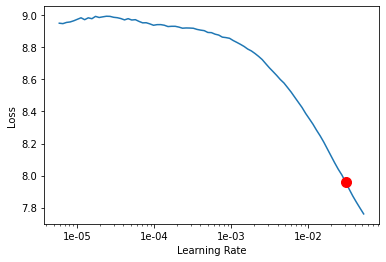

In [11]:
learn.lr_find(start_lr=2e-6, end_lr=1e-1)
learn.recorder.plot(suggestion = True)

In [12]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.784635,5.163657,0.272842,00:07
1,5.386045,4.785492,0.306734,00:07


In [13]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.275206,4.717874,0.315848,00:10
1,3.625883,4.041324,0.386644,00:10
2,2.822384,3.882045,0.422098,00:10


In [14]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-04
Min loss divided by 10: 2.75E-03


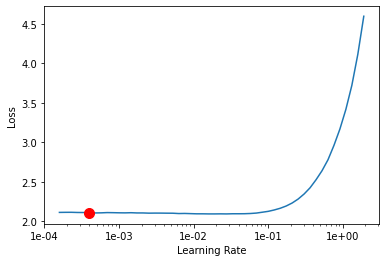

In [15]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [16]:
learn.fit_one_cycle(3, slice(2e-2/(2.6**4), 2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.252617,3.827250,0.434747,00:08
1,2.131788,3.758189,0.452827,00:08
2,1.854340,3.729001,0.461682,00:08


In [17]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-04
Min loss divided by 10: 8.32E-05


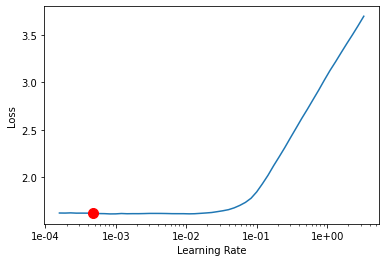

In [18]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [19]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.655563,3.718288,0.469829,00:09
1,1.637340,3.679714,0.480097,00:09
2,1.507278,3.676965,0.484301,00:09


In [20]:
#save the encoder model
learn.save_encoder('my_encoder')

In [21]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (16010 items)
x: TextList
xxbos പലദശ പല ഭഷ ഒര ഒര രജവ അലലത സവനത രജവയത അലല,xxbos ഈ ഓണ ഏടടന പളളർകക xxunk എനന ഉളളവർ ലക അട,xxbos ആരണട ആരണട തലണടകണ ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ xxmaj royal xxmaj mech ആട ആരണട ആരണട മശ പരകകനന ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal xxmaj mech ആട,xxbos xxmaj sushin syam xxmaj xxunk khalid xxmaj midhun manual,xxbos j a k e s b xxup xxunk o y
y: CategoryList
Not_offensive,Not_offensive,Not_offensive,Not_offensive,Not_offensive
Path: .;

Valid: LabelList (1999 items)
x: TextList
xxbos xxmaj xxunk xxup bgm um xxunk xxunk like,xxbos ഇത ഒര പണണ തനന ആണ direct ചയയനനത polichu nivin,xxbos പഥവരജ സരജടടൻ ലല xxunk xxmaj lal jr നറ ഒര വറററ ചതര പരതകഷകകനന xxmaj best wishes team,xxbos പകരത മകകള പകക നൻ കണട എനറയ അമമ പളയ മറകകലല ഒരകകല,xxbos avan xxmaj varum ente xxmaj makan xxmaj madhura xxmaj raja
y: CategoryList
Not_offensive,Not_offensive,Not_offensive,Not_offensive,Not_offensive
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
  

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 5.25E-02


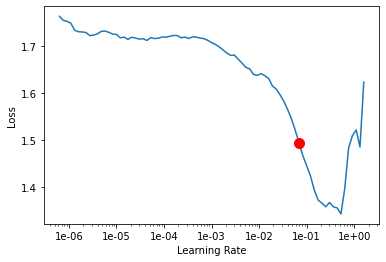

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [24]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.332115,0.300924,0.916958,0.377410,00:07
1,0.285254,0.267601,0.921461,0.000000,00:08
2,0.319182,0.258392,0.920960,0.000000,00:07


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

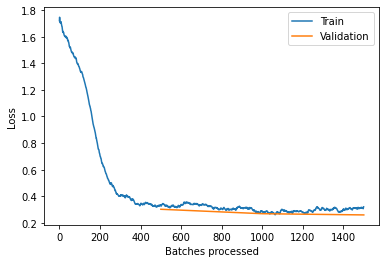

In [25]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.31E-07


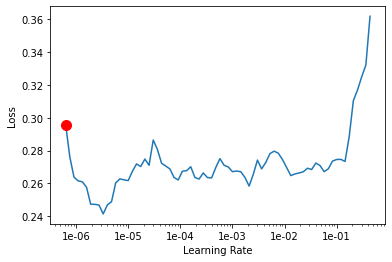

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.314551,0.242268,0.929465,0.433661,00:09
1,0.233038,0.215735,0.934967,0.519974,00:09


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 3.98E-07


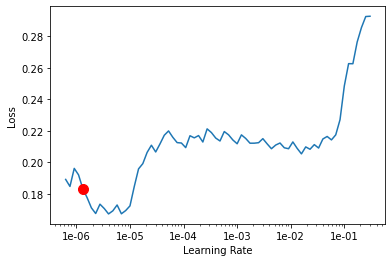

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.254961,0.224488,0.939970,0.596141,00:14
1,0.144617,0.183208,0.946974,0.597318,00:14


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

In [30]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.175864,0.175284,0.948974,0.681401,00:19
1,0.091498,0.172438,0.957479,0.722509,00:18


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.117889,0.186289,0.951976,0.693919,00:20
1,0.065798,0.182288,0.957479,0.718234,00:20


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.043904,0.193056,0.953977,0.723243,00:20
1,0.032112,0.216842,0.956478,0.735910,00:19
2,0.022980,0.213919,0.955478,0.724706,00:20


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/nu

In [31]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [32]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,1751,2,11,8,34
1,2,8,0,2,0
2,2,1,12,0,0
3,4,2,1,10,0
4,20,0,0,0,129


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[1751    2   11    8   34]
 [   2    8    0    2    0]
 [   2    1   12    0    0]
 [   4    2    1   10    0]
 [  20    0    0    0  129]]
0.9554777388694348


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1806
           1       0.62      0.67      0.64        12
           2       0.50      0.80      0.62        15
           3       0.50      0.59      0.54        17
           4       0.79      0.87      0.83       149

    accuracy                           0.96      1999
   macro avg       0.68      0.78      0.72      1999
weighted avg       0.96      0.96      0.96      1999

